# Classificador estelar

## Importando as bibliotecas e os dados

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import joblib as jb

In [22]:
data = pd.read_csv('/content/6 class csv.csv')
data

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


### Informações do conjunto de dados:
Este é um conjunto de dados composto por várias características de estrelas.

#### Alguns deles são:

- Temperatura Absoluta (in K)
- Luminosidade Relativa (L/Lo)
- Raio relativo (R/Ro)
- Magnitude absoluta (Mv)
- Cor da estrela (white,Red,Blue,Yellow,yellow-orange etc)
- Classe Espectral (O,B,A,F,G,K,,M)
- Tipo de estrela **(Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants)**
- Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)
- Ro = 6.9551 x 10^8 m (Avg Radius of Sun)

#### Propósito:
O objetivo de fazer o conjunto de dados é provar que as estrelas seguem um determinado gráfico no Espaço celeste,
para que possamos classificar estrelas traçando suas características com base nos gráficos Hertzsprung-Russell e DiagramHR-Diagram

### observação:
O conjunto de dados é criado com base em várias equações em astrofísica. Eles são dados abaixo:

- Lei de Stefan-Boltzmann da radiação do corpo negro (Para encontrar a - luminosidade de uma estrela)
- Lei de deslocamento de Wienn (para encontrar a temperatura da superfície de uma estrela usando comprimento de onda)
- Relação de magnitude absoluta
- Raio de uma estrela usando paralaxe

In [4]:
data.isnull().sum() # Verificando valores ausentes

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

In [5]:
data.dtypes # Verificando os tipos de dados

Temperature (K)             int64
Luminosity(L/Lo)          float64
Radius(R/Ro)              float64
Absolute magnitude(Mv)    float64
Star type                   int64
Star color                 object
Spectral Class             object
dtype: object

<ipython-input-14-201e56835124>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='magma')


<Axes: >

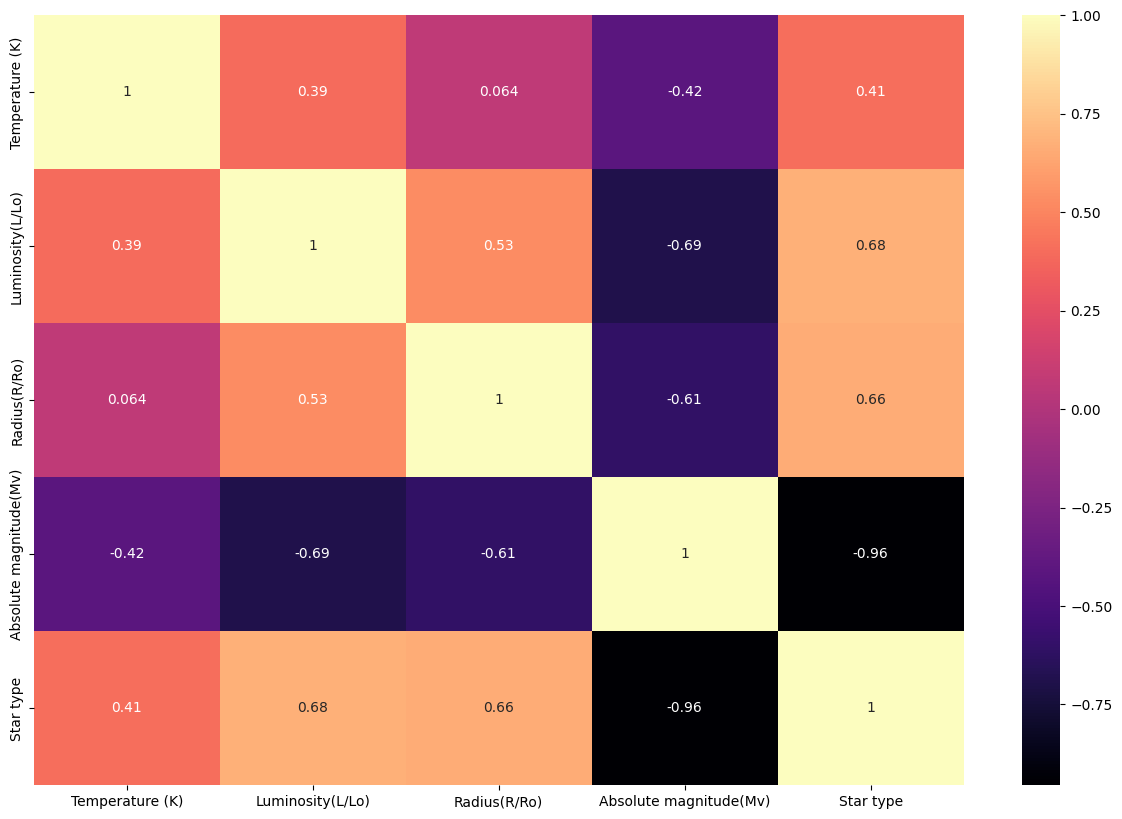

In [14]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(),annot=True,cmap='magma')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [17]:
data.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


## Preparação dos dados

- Teremos que fazer o one hot encode das colunas 'Star color' e 'Spectral Class'

In [19]:
def agrupar(df, coluna, nova_coluna, limite):
    tab_text = df[coluna].value_counts()
    lista_aux = []
    for x in tab_text.index:
        if tab_text[x] < limite:
            lista_aux.append(x)
    for y in lista_aux:
        df.loc[df[coluna]==y, coluna] = nova_coluna
    return df

In [11]:
data['Star color'].value_counts()

Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              3
Yellowish White         3
white                   3
Whitish                 2
Orange                  2
yellowish               2
Pale yellow orange      1
White-Yellow            1
Blue                    1
Yellowish               1
Orange-Red              1
Blue white              1
Blue-White              1
Name: Star color, dtype: int64

In [23]:
agrupar(data, 'Star color', 'Other', 20)
data['Star color'].value_counts()

Red           112
Blue           55
Other          47
Blue-white     26
Name: Star color, dtype: int64

In [12]:
data['Spectral Class'].value_counts()

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral Class, dtype: int64

In [24]:
colunas = ['Star color', 'Spectral Class'] # Fazendo one hot encode da coluna Label
for coluna in colunas:
    data.loc[data[coluna]=='Red', coluna] = 0
    data.loc[data[coluna]=='Blue', coluna] = 1
    data.loc[data[coluna]=='Blue-white', coluna] = 2
    data.loc[data[coluna]=='Other', coluna] = 3
    data.loc[data[coluna]=='M', coluna] = 0
    data.loc[data[coluna]=='B', coluna] = 1
    data.loc[data[coluna]=='O', coluna] = 2
    data.loc[data[coluna]=='A', coluna] = 3
    data.loc[data[coluna]=='F', coluna] = 4
    data.loc[data[coluna]=='K', coluna] = 5
    data.loc[data[coluna]=='G', coluna] = 6
display(data)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,0,0
1,3042,0.000500,0.1542,16.60,0,0,0
2,2600,0.000300,0.1020,18.70,0,0,0
3,2800,0.000200,0.1600,16.65,0,0,0
4,1939,0.000138,0.1030,20.06,0,0,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,1,2
236,30839,834042.000000,1194.0000,-10.63,5,1,2
237,8829,537493.000000,1423.0000,-10.73,5,3,3
238,9235,404940.000000,1112.0000,-11.23,5,3,3


In [25]:
data.dtypes

Temperature (K)             int64
Luminosity(L/Lo)          float64
Radius(R/Ro)              float64
Absolute magnitude(Mv)    float64
Star type                   int64
Star color                 object
Spectral Class             object
dtype: object

In [26]:
data['Star color'] = data['Star color'].astype(np.int32, copy=False)
data['Spectral Class'] = data['Spectral Class'].astype(np.int32, copy=False)

print(data.dtypes)

Temperature (K)             int64
Luminosity(L/Lo)          float64
Radius(R/Ro)              float64
Absolute magnitude(Mv)    float64
Star type                   int64
Star color                  int32
Spectral Class              int32
dtype: object


In [27]:
data

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,0,0
1,3042,0.000500,0.1542,16.60,0,0,0
2,2600,0.000300,0.1020,18.70,0,0,0
3,2800,0.000200,0.1600,16.65,0,0,0
4,1939,0.000138,0.1030,20.06,0,0,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,1,2
236,30839,834042.000000,1194.0000,-10.63,5,1,2
237,8829,537493.000000,1423.0000,-10.73,5,3,3
238,9235,404940.000000,1112.0000,-11.23,5,3,3


## Construção dos modelos

In [56]:
y = data['Star type']
x = data.drop('Star type', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [48]:
x_train

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class
95,11250,672.00000,6.9800,-2.300,2,3
126,2935,0.00087,0.0932,16.880,0,0
120,3323,0.00043,0.0912,17.160,0,0
67,2817,0.00098,0.0911,16.450,0,0
101,40000,813000.00000,14.0000,-6.230,1,2
...,...,...,...,...,...,...
106,24630,363000.00000,63.0000,-5.830,1,2
14,2650,0.00060,0.1400,11.782,0,0
92,4077,0.08500,0.7950,6.228,3,5
179,24490,248490.00000,1134.5000,-8.240,2,1


### Árvore de decisão

In [31]:
dtc = DecisionTreeClassifier(random_state=42)

In [57]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [58]:
y_preds_dtc = dtc.predict(x_test)

### Regressão logística

In [36]:
lr = LogisticRegression(random_state=42)

In [59]:
lr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [60]:
y_preds_lr = lr.predict(x_test)

### Naive Bayes

In [33]:
gnb = GaussianNB()

In [61]:
gnb.fit(x_train, y_train)

GaussianNB()

In [62]:
y_preds_gnb = gnb.predict(x_test)

### Avaliação dos modelos

In [63]:
print(f"A acurácia do modelo de árvore de decisão é de: {accuracy_score(y_test, y_preds_dtc) * 100}%")
print(f"A acurácia do modelo de regressão logística é de: {accuracy_score(y_test, y_preds_lr) * 100}%")
print(f"A acurácia do modelo de regressão logística é de: {accuracy_score(y_test, y_preds_gnb) * 100}%")

A acurácia do modelo de árvore de decisão é de: 100.0%
A acurácia do modelo de regressão logística é de: 70.83333333333334%
A acurácia do modelo de regressão logística é de: 86.11111111111111%


Random Forest (Árvore de desisão foi o melhor modelo)

## Visualização

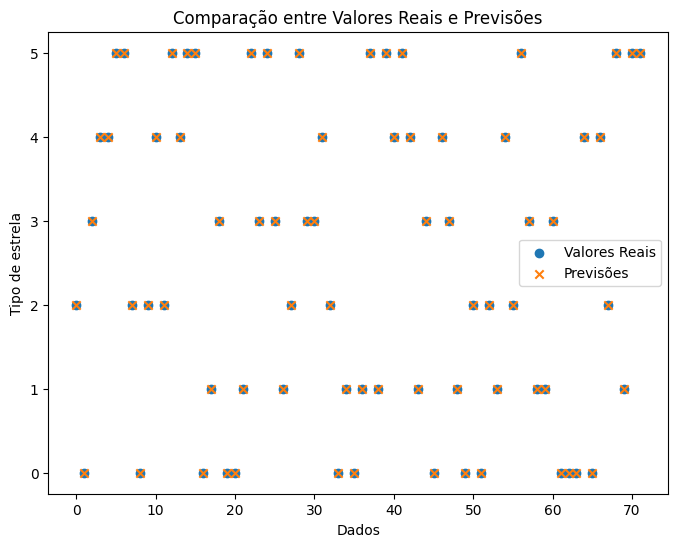

In [65]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, label="Valores Reais", marker='o')
plt.scatter(range(len(y_preds_dtc)), y_preds_dtc, label="Previsões", marker='x')
plt.xlabel("Dados")
plt.ylabel("Tipo de estrela")
plt.title("Comparação entre Valores Reais e Previsões")
plt.legend()
plt.show()

## Salvando o modelo para deploy

In [67]:
jb.dump(dtc, 'starpredict.joblib.pkl')

['starpredict.joblib.pkl']